## Bibliotecas

In [1]:
# https://cran.r-project.org/web/packages/RSNNS/RSNNS.pdf
# https://cran.r-project.org/web/packages/RSNNS/index.html
# https://www.rdocumentation.org/packages/RSNNS/versions/0.4-11
# https://rdrr.io/cran/RSNNS/man/mlp.html
# https://rdrr.io/cran/RSNNS/man/RSNNS-package.html
# https://github.com/cbergmeir/RSNNS
# https://github.com/cran/RSNNS
library('RSNNS')

Loading required package: Rcpp


In [2]:
#install.packages('dslabs')
# https://rdrr.io/cran/dslabs/
# https://github.com/rafalab/dslabs
# https://www.rdocumentation.org/packages/dslabs/versions/0.5.2
# https://cran.r-project.org/web/packages/dslabs/index.html
# https://cran.r-project.org/web/packages/dslabs/dslabs.pdf
library('dslabs')

## Datasets

### mnist

In [3]:
# http://beyondvalence.blogspot.com/2014/03/neural-network-prediction-of.html
mnist <- read_mnist()

In [4]:
str(mnist)

List of 2
 $ train:List of 2
  ..$ images: int [1:60000, 1:784] 0 0 0 0 0 0 0 0 0 0 ...
  ..$ labels: int [1:60000] 5 0 4 1 9 2 1 3 1 4 ...
 $ test :List of 2
  ..$ images: int [1:10000, 1:784] 0 0 0 0 0 0 0 0 0 0 ...
  ..$ labels: int [1:10000] 7 2 1 0 4 1 4 9 5 9 ...


### iris

In [5]:
str(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


## Preproceso

### iris

In [6]:
# shuffle (with sample)
set.seed(1)
iris_s <- iris[sample(1:nrow(iris), length(1:nrow(iris))), 1:ncol(iris)] 


In [7]:
# Split Train/Test
iris_s <- splitForTrainingAndTest(iris_s[, 1:4], # irisValues (features)
                                  decodeClassLabels(iris_s[, 5]), #irisTargets Hot encoded 
                                  ratio = 0.15)

In [8]:
str(iris_s)

List of 4
 $ inputsTrain : num [1:127, 1:4] 5.1 5.7 5.4 6.3 4.7 7.4 6.3 5.6 5.5 4.4 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:127] "40" "56" "85" "134" ...
  .. ..$ : chr [1:4] "Sepal.Length" "Sepal.Width" "Petal.Length" "Petal.Width"
 $ targetsTrain: num [1:127, 1:3] 1 0 0 0 1 0 0 0 0 1 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:3] "setosa" "versicolor" "virginica"
 $ inputsTest  : num [1:23, 1:4] 5.6 5 6.3 7.2 6.3 4.9 5.4 6.9 6.1 6 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:23] "89" "36" "147" "126" ...
  .. ..$ : chr [1:4] "Sepal.Length" "Sepal.Width" "Petal.Length" "Petal.Width"
 $ targetsTest : num [1:23, 1:3] 0 1 0 0 0 1 1 0 0 0 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:3] "setosa" "versicolor" "virginica"


In [9]:
# Standarization (Normalization and Scale)
iris_s <- normTrainingAndTestSet(iris_s)

In [10]:
str(iris_s)

List of 4
 $ inputsTrain : num [1:127, 1:4] -0.848 -0.134 -0.491 0.58 -1.324 ...
  ..- attr(*, "normParams")=List of 3
  .. ..$ colMeans: num [1:4] 5.81 3.05 3.72 1.19
  .. ..$ colSds  : num [1:4] 0.84 0.435 1.757 0.764
  .. ..$ type    : chr "norm"
 $ targetsTrain: num [1:127, 1:3] 1 0 0 0 1 0 0 0 0 1 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:3] "setosa" "versicolor" "virginica"
 $ inputsTest  : num [1:23, 1:4] -0.253 -0.967 0.58 1.651 0.58 ...
  ..- attr(*, "normParams")=List of 3
  .. ..$ colMeans: num [1:4] 5.81 3.05 3.72 1.19
  .. ..$ colSds  : num [1:4] 0.84 0.435 1.757 0.764
  .. ..$ type    : chr "norm"
 $ targetsTest : num [1:23, 1:3] 0 1 0 0 0 1 1 0 0 0 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:3] "setosa" "versicolor" "virginica"


### mnist

In [11]:
# En esta caso todos los píxeles tienen el mismo rango por lo que solamente necesitan ser escalados
# DUDA: ¿https://www.rdocumentation.org/packages/base/versions/3.5.2/topics/scale?
# https://stats.stackexchange.com/questions/230166/scale-mnist-data-to-0-9-0-9
# https://github.com/Srungeer-Simha/MNIST-digit-recognition-using-SVM/blob/master/MNIST%20digit%20recognition%20-%20SVM.R
# https://rrighart.github.io/Digits/
# https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d
mnist_s <- list(train = list(images = mnist$train$images/255, 
                             labels = decodeClassLabels(mnist$train$labels)
                            ), 
                test  = list(images = mnist$test$images/255, 
                             labels = decodeClassLabels(mnist$test$labels)
                            )
               )
str(mnist_s)

List of 2
 $ train:List of 2
  ..$ images: num [1:60000, 1:784] 0 0 0 0 0 0 0 0 0 0 ...
  ..$ labels: num [1:60000, 1:10] 0 1 0 0 0 0 0 0 0 0 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : NULL
  .. .. ..$ : chr [1:10] "0" "1" "2" "3" ...
 $ test :List of 2
  ..$ images: num [1:10000, 1:784] 0 0 0 0 0 0 0 0 0 0 ...
  ..$ labels: num [1:10000, 1:10] 0 0 0 1 0 0 0 0 0 0 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : NULL
  .. .. ..$ : chr [1:10] "0" "1" "2" "3" ...


##  Modelo MLP

### Iris

In [12]:
# Train
model_iris <- mlp(iris_s$inputsTrain, iris_s$targetsTrain, 
                  size = 5, learnFuncParams = 0.1, maxit = 60, 
                  inputsTest = iris_s$inputsTest, targetsTest = iris_s$targetsTest)

In [13]:
model_iris

Class: mlp->rsnns
Number of inputs: 4 
Number of outputs: 3 
Maximal iterations: 60 
Initialization function: Randomize_Weights 
Initialization function parameters: -0.3 0.3 
Learning function: Std_Backpropagation 
Learning function parameters: 0.1 
Update function:Topological_Order
Update function parameters: 0 
Patterns are shuffled internally: TRUE 
Compute error in every iteration: TRUE 
Architecture Parameters:
$size
[1] 5

All members of model:
 [1] "nInputs"               "maxit"                 "initFunc"             
 [4] "initFuncParams"        "learnFunc"             "learnFuncParams"      
 [7] "updateFunc"            "updateFuncParams"      "shufflePatterns"      
[10] "computeIterativeError" "snnsObject"            "archParams"           
[13] "IterativeFitError"     "IterativeTestError"    "fitted.values"        
[16] "fittedTestValues"      "nOutputs"             

In [14]:
extractNetInfo(model_iris)

$infoHeader
                name               value
1       no. of units                  12
2 no. of connections                  35
3  no. of unit types                   0
4  no. of site types                   0
5  learning function Std_Backpropagation
6    update function   Topological_Order

$unitDefinitions
   unitNo          unitName       unitAct    unitBias        type posX posY
1       1           Input_1 -0.8481681347  0.06878698  UNIT_INPUT    1    0
2       2           Input_2  1.7172917128  0.03429574  UNIT_INPUT    2    0
3       3           Input_3 -1.0353536606 -0.10273361  UNIT_INPUT    3    0
4       4           Input_4 -1.0281265974 -0.02812114  UNIT_INPUT    4    0
5       5        Hidden_2_1  0.9967541695  1.97652531 UNIT_HIDDEN    1    2
6       6        Hidden_2_2  0.0144360233  0.38606557 UNIT_HIDDEN    2    2
7       7        Hidden_2_3  0.9990627170  2.55375266 UNIT_HIDDEN    3    2
8       8        Hidden_2_4  0.0099294875  0.51586378 UNIT_HIDDEN    4    2
9       9        Hidden_2_5  0.0052233879  1.28743649 UNIT_HIDDEN    5    2
10     10     Output_setosa  0.9603418708  0.01950675 UNIT_OUTPUT    1    4
11     11 Output_versicolor  0.1874711514 -4.70711517 UNIT_OUTPUT    2    4
12     12  Output_virginica  0.0004799908 -0.79085964 UNIT_OUTPUT    3    4
   posZ      actFunc      outFunc sites
1     0 Act_Identity Out_Identity      
2     0 Act_Identity Out_Identity      
3     0 Act_Identity Out_Identity      
4     0 Act_Identity Out_Identity      
5     0 Act_Logistic Out_Identity      
6     0 Act_Logistic Out_Identity      
7     0 Act_Logistic Out_Identity      
8     0 Act_Logistic Out_Identity      
9     0 Act_Logistic Out_Identity      
10    0 Act_Logistic Out_Identity      
11    0 Act_Logistic Out_Identity      
12    0 Act_Logistic Out_Identity      

$fullWeightMatrix
                  Input_1 Input_2 Input_3 Input_4 Hidden_2_1 Hidden_2_2
Input_1                 0       0       0       0  0.2084407  0.4157994
Input_2                 0       0       0       0  0.1132473 -1.2578596
Input_3                 0       0       0       0 -1.3111145  1.2235508
Input_4                 0       0       0       0 -2.3104682  0.8072597
Hidden_2_1              0       0       0       0  0.0000000  0.0000000
Hidden_2_2              0       0       0       0  0.0000000  0.0000000
Hidden_2_3              0       0       0       0  0.0000000  0.0000000
Hidden_2_4              0       0       0       0  0.0000000  0.0000000
Hidden_2_5              0       0       0       0  0.0000000  0.0000000
Output_setosa           0       0       0       0  0.0000000  0.0000000
Output_versicolor       0       0       0       0  0.0000000  0.0000000
Output_virginica        0       0       0       0  0.0000000  0.0000000
                   Hidden_2_3 Hidden_2_4 Hidden_2_5 Output_setosa
Input_1            0.29920870  0.1766878  0.7407534      0.000000
Input_2            0.07215004 -1.2827166 -1.6325650      0.000000
Input_3           -1.81650555  1.4037654  1.6144031      0.000000
Input_4           -2.59405518  1.2761834  1.3942412      0.000000
Hidden_2_1         0.00000000  0.0000000  0.0000000      1.679274
Hidden_2_2         0.00000000  0.0000000  0.0000000     -1.903718
Hidden_2_3         0.00000000  0.0000000  0.0000000      1.558027
Hidden_2_4         0.00000000  0.0000000  0.0000000     -2.434654
Hidden_2_5         0.00000000  0.0000000  0.0000000     -2.152975
Output_setosa      0.00000000  0.0000000  0.0000000      0.000000
Output_versicolor  0.00000000  0.0000000  0.0000000      0.000000
Output_virginica   0.00000000  0.0000000  0.0000000      0.000000
                  Output_versicolor Output_virginica
Input_1                   0.0000000         0.000000
Input_2                   0.0000000         0.000000
Input_3                   0.0000000         0.000000
Input_4                   0.0000000         0.000000
Hidden_2_1                1.1386397        -3.454794
Hidden_2_2                0.5730166         

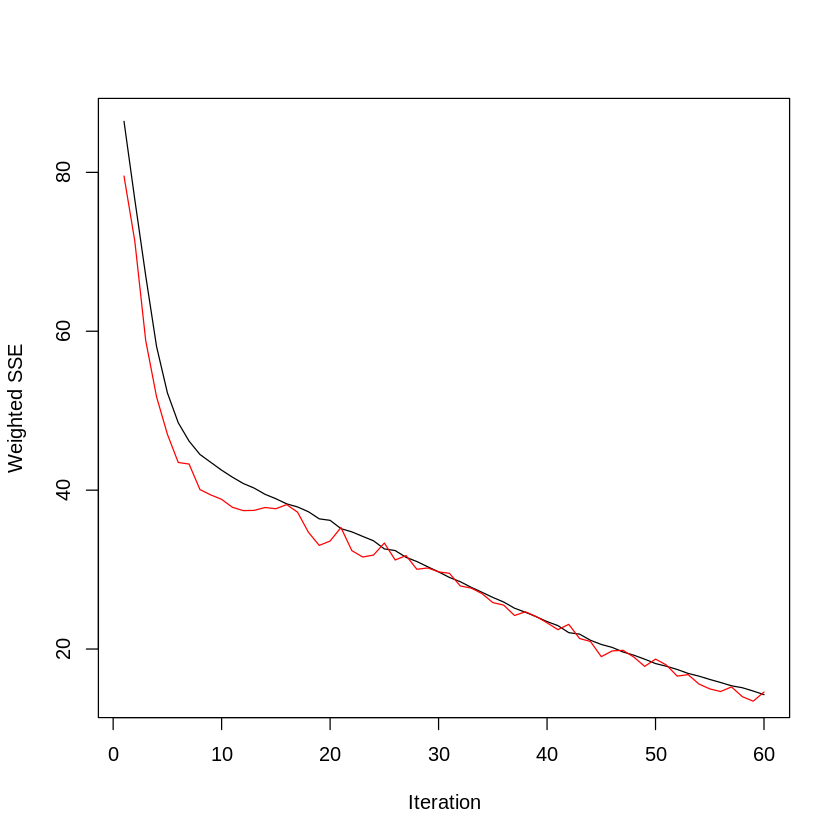

In [15]:
plotIterativeError(model_iris)

### mnist

In [38]:
#::nota::tarda unos minutos (!!)
#::nota::no sé por qué NO funciona la introducción de mnist_s$test
model_mnist <- mlp(mnist_s$train$images, mnist_s$train$labels,
                   size = 16, learnFuncParams = 0.1, maxit = 100,
                   inputTest = mnist_s$test$images, targetsTest = mnist_s$test$labels)

In [39]:
model_mnist

Class: mlp->rsnns
Number of inputs: 784 
Number of outputs: 10 
Maximal iterations: 100 
Initialization function: Randomize_Weights 
Initialization function parameters: -0.3 0.3 
Learning function: Std_Backpropagation 
Learning function parameters: 0.1 
Update function:Topological_Order
Update function parameters: 0 
Patterns are shuffled internally: TRUE 
Compute error in every iteration: TRUE 
Architecture Parameters:
$size
[1] 16

All members of model:
 [1] "nInputs"               "maxit"                 "initFunc"             
 [4] "initFuncParams"        "learnFunc"             "learnFuncParams"      
 [7] "updateFunc"            "updateFuncParams"      "shufflePatterns"      
[10] "computeIterativeError" "snnsObject"            "archParams"           
[13] "IterativeFitError"     "fitted.values"         "nOutputs"             

In [42]:
length(model_mnist$IterativeFitError)

[1] 100

In [43]:
str(fitted.values(model_mnist))

 num [1:60000, 1:10] 1.92e-04 9.99e-01 3.82e-11 1.04e-11 1.35e-11 ...


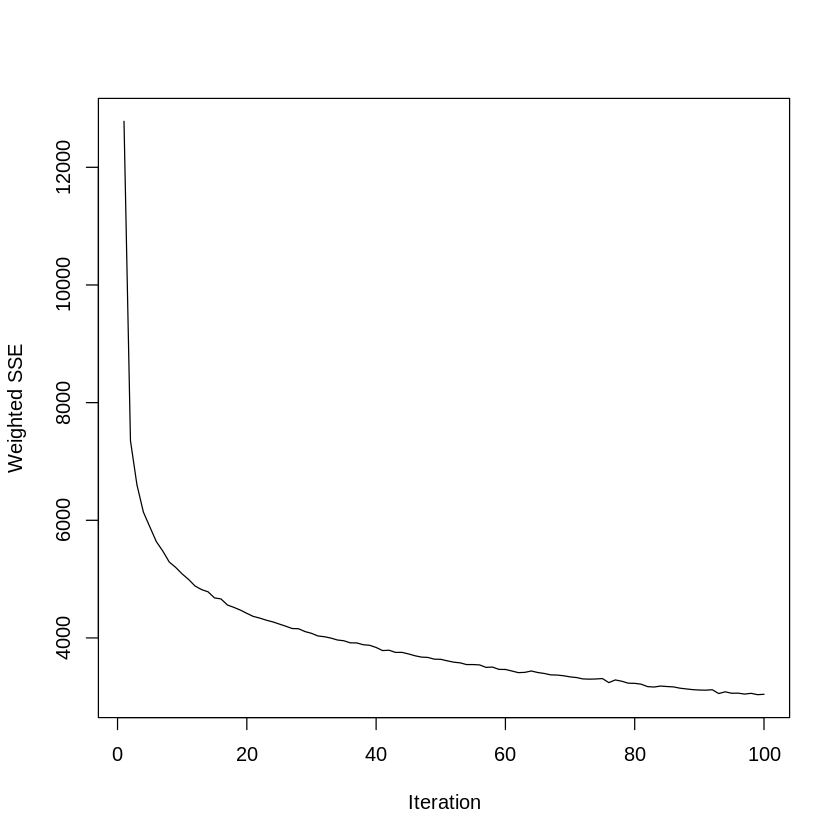

In [40]:
#::GMG::No sale la parte de test en rojo (?!)
plotIterativeError(model_mnist)

### Predicción

In [44]:
weightMatrix(model_iris)

,Input_1,Input_2,Input_3,Input_4,Hidden_2_1,Hidden_2_2,Hidden_2_3,Hidden_2_4,Hidden_2_5,Output_setosa,Output_versicolor,Output_virginica
Input_1,0,0,0,0,0.2084407,0.4157994,0.29920870,0.1766878,0.7407534,0.000000,0.0000000,0.000000
Input_2,0,0,0,0,0.1132473,-1.2578596,0.07215004,-1.2827166,-1.6325650,0.000000,0.0000000,0.000000
Input_3,0,0,0,0,-1.3111145,1.2235508,-1.81650555,1.4037654,1.6144031,0.000000,0.0000000,0.000000
Input_4,0,0,0,0,-2.3104682,0.8072597,-2.59405518,1.2761834,1.3942412,0.000000,0.0000000,0.000000
Hidden_2_1,0,0,0,0,0.0000000,0.0000000,0.00000000,0.0000000,0.0000000,1.679274,1.1386397,-3.454794
Hidden_2_2,0,0,0,0,0.0000000,0.0000000,0.00000000,0.0000000,0.0000000,-1.903718,0.5730166,1.307913
Hidden_2_3,0,0,0,0,0.0000000,0.0000000,0.00000000,0.0000000,0.0000000,1.558027,2.0798967,-3.452202
Hidden_2_4,0,0,0,0,0.0000000,0.0000000,0.00000000,0.0000000,0.0000000,-2.434654,0.8314279,1.898671
Hidden_2_5,0,0,0,0,0.0000000,0.0000000,0.00000000,0.0000000,0.0000000,-2.152975,2.1384485,0.844058
Output_setosa,0,0,0,0,0.0000000,0.0000000,0.00000000,0.0000000,0.0000000,0.000000,0.0000000,0.000000


In [20]:
# Predict
predictions_iris <- predict(model_iris, iris_s$inputsTest)

In [21]:
head(predictions_iris)

0.085146300,0.6927439,0.0344312526
0.956521511,0.1954876,0.0005074329
0.003617003,0.3997899,0.8232519627
0.003817929,0.3644625,0.8347600698
0.005292352,0.4662571,0.6988753080
0.952109456,0.2032968,0.0005423008


In [22]:
str(predictions_iris)

 num [1:23, 1:3] 0.08515 0.95652 0.00362 0.00382 0.00529 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : NULL


In [23]:
predictions_mnist <- predict(model_mnist, mnist_s$test$images)

In [24]:
head(predictions_mnist)

4.760631e-09,3.182100e-11,4.417698e-06,1.224030e-04,7.718395e-06,2.784260e-09,2.484722e-14,9.999996e-01,1.650189e-06,3.764096e-08
1.836062e-06,2.388146e-03,9.984929e-01,1.011951e-02,1.955765e-13,1.327548e-07,3.225019e-05,1.230490e-08,2.870031e-08,1.418346e-15
1.506977e-10,9.999237e-01,8.102510e-06,1.047438e-07,3.203307e-13,1.908541e-08,3.404179e-05,7.781573e-05,2.423743e-05,2.089417e-11
9.993417e-01,9.471514e-08,6.780648e-03,4.252242e-06,6.164918e-14,1.339179e-08,8.155225e-06,1.091385e-05,3.804407e-05,4.231258e-03
2.242883e-07,3.849796e-12,2.942902e-07,2.576456e-07,9.999006e-01,7.679503e-08,7.101634e-07,1.596570e-03,8.883517e-09,2.669639e-07
3.096430e-10,9.999654e-01,6.798680e-07,8.084942e-09,7.079386e-16,4.236739e-08,3.486301e-06,8.091199e-05,1.544491e-04,4.742015e-07


In [25]:
str(predictions_mnist)

 num [1:10000, 1:10] 4.76e-09 1.84e-06 1.51e-10 9.99e-01 2.24e-07 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : NULL


### Validación

In [26]:
confusionMatrix(iris_s$targetsTrain, fitted.values(model_iris))

       predictions
targets  1  2  3
      1 43  0  0
      2  0 42  2
      3  0  2 38

In [27]:
confusionMatrix(iris_s$targetsTrain, 
                encodeClassLabels(fitted.values(model_iris), 
                                  method = "402040", 
                                  l = 0.4, h = 0.6))

       predictions
targets  0  1  2  3
      1  0 43  0  0
      2  6  0 38  0
      3  7  0  1 32

In [28]:
confusionMatrix(iris_s$targetsTest, predictions_iris)

       predictions
targets 1 2 3
      1 7 0 0
      2 0 6 0
      3 0 1 9

In [30]:
# https://stackoverflow.com/questions/4903092/calculate-auc-in-r
#auroc <- function(score, bool) {
#  n1 <- sum(!bool)
#  n2 <- sum(bool)
#  U  <- sum(rank(score)[!bool]) - n1 * (n1 + 1) / 2
#  return(1 - U / n1 / n2)
#}

In [31]:
#auroc(predictions[, 2], iris_s$targetsTest[, 2])

In [32]:
confusionMatrix(mnist_s$train$labels, fitted.values(model_mnist))

       predictions
targets    1    2    3    4    5    6    7    8    9   10
     1  5827    0    7    4    9    4   12    7   50    3
     2     1 6626   23   25    8    7    6   14   26    6
     3    19   11 5724   26   38    9   22   32   73    4
     4    13    6   42 5919    4   24   14   42   41   26
     5    13    7    8    2 5711    7   18   18    6   52
     6    21    9   23   83   12 5167   30   11   50   15
     7    22    6    6    1   12   14 5815    1   40    1
     8     9   18   35   13   42    6    7 6096    7   32
     9     5   21   29   18    5   21   16   10 5717    9
     10   13    5    7   45   54   15    4   57   24 5725

In [37]:
confusionMatrix(mnist_s$test$labels, predictions_mnist)

       predictions
targets    1    2    3    4    5    6    7    8    9   10
     1   964    0    2    2    0    4    3    3    2    0
     2     0 1111    3    1    1    2    4    4    9    0
     3    11    2  962    7    9    3    8   10   18    2
     4     2    0   12  952    1    8    5   15    8    7
     5     0    1    2    2  934    2    9    8    4   20
     6     9    1    1   30    6  813   11    4   12    5
     7    13    3    4    1    9   10  907    0   11    0
     8     2    7   19   10    5    0    1  972    2   10
     9     4    3    4    9    6    8    6   14  914    6
     10    5    6    0   13   27    7    1   20    8  922